# LOGISTIC REGRESSION ASSIGNMENT

Q1. Use logistic regression to find the decision boundary for the given dataset. Set your learning rate to 0.1. What is the cost function value and learning parameter value after convergence?

In [3]:
import numpy as np
import pandas as pd

# Loading datasets
X = pd.read_csv("logisticX.csv").values
y = pd.read_csv("logisticY.csv").values

# Normalizing features
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Adding intercept (bias) term
X = np.hstack([np.ones((X.shape[0], 1)), X])  # shape: (m, n+1)

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    epsilon = 1e-5  # To avoid log(0)
    return (-1 / m) * (y.T @ np.log(h + epsilon) + (1 - y).T @ np.log(1 - h + epsilon))

# Gradient descent
def gradient_descent(X, y, alpha=0.1, num_iters=1000, tol=1e-6):
    m, n = X.shape
    theta = np.zeros((n, 1))
    cost_history = []

    for i in range(num_iters):
        h = sigmoid(X @ theta)
        gradient = (1 / m) * (X.T @ (h - y))
        theta -= alpha * gradient

        cost = compute_cost(X, y, theta)
        cost_history.append(cost[0][0])

        # Early stopping if cost change is very small
        if i > 0 and abs(cost_history[-2] - cost_history[-1]) < tol:
            print(f"Converged at iteration {i}")
            break

    return theta, cost_history

# Running training
theta_final, cost_history = gradient_descent(X, y, alpha=0.1)

# Output final
print("Final cost value:", cost_history[-1])
print("Learned parameters (theta):\n", theta_final)


Final cost value: 0.22612383169703448
Learned parameters (theta):
 [[ 0.38193936]
 [ 2.35449296]
 [-2.53913828]]


Q2. Plot cost function vs iteration graph for the model trained in Question 1.

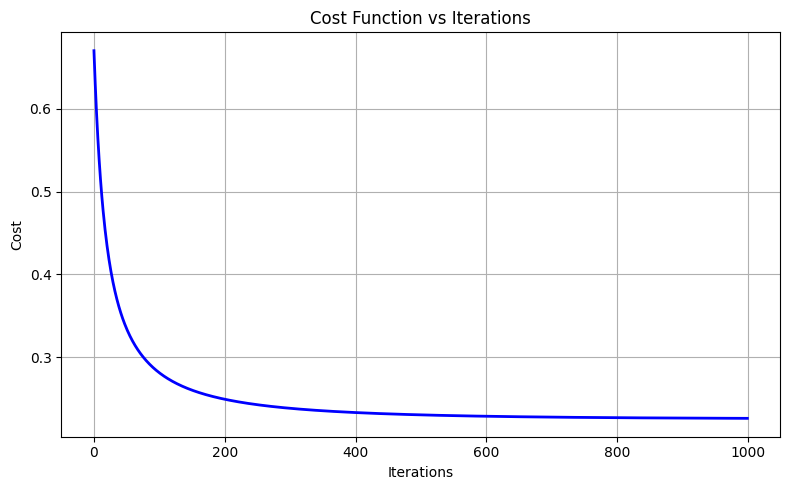

In [4]:
import matplotlib.pyplot as plt

# Plotting cost vs iteration
def plot_cost_vs_iterations(cost_history):
    plt.figure(figsize=(8, 5))
    plt.plot(range(len(cost_history)), cost_history, color='blue', linewidth=2)
    plt.title('Cost Function vs Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Calling the function
plot_cost_vs_iterations(cost_history)


Q3. Plot the given dataset on a graph, use different colors for different classes and also show the decision boundary you obtained in Question 1.
Do not use scatter plot.

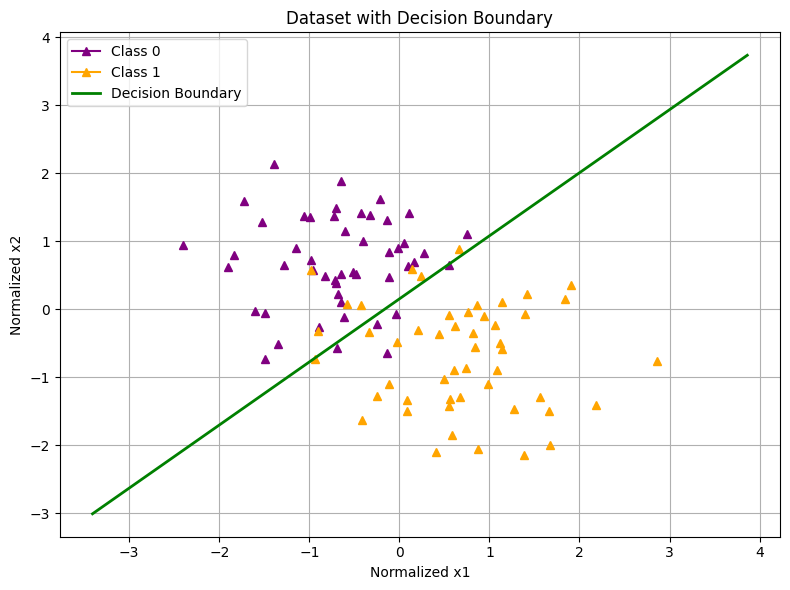

In [5]:
def plot_decision_boundary(X, y, theta):
    plt.figure(figsize=(8, 6))

    # Separating points for class 0 and class 1
    x_vals = X[:, 1]  # x1
    y_vals = X[:, 2]  # x2
    y_flat = y.flatten()

    # Plotting class 0 and class 1 with different colors using line plotting
    # Plotting class 0 and class 1 with different colors using line plotting
    for i in range(len(y_flat)):
        color = 'purple' if y_flat[i] == 0 else 'orange'
        if i == 0 and y_flat[i] == 0:
            plt.plot(x_vals[i], y_vals[i], marker='^', color=color, label='Class 0')
        elif i == 0 and y_flat[i] == 1:
            plt.plot(x_vals[i], y_vals[i], marker='^', color=color, label='Class 1')
        elif y_flat[i] == 0 and 'Class 0' not in plt.gca().get_legend_handles_labels()[1]:
            plt.plot(x_vals[i], y_vals[i], marker='^', color=color, label='Class 0')
        elif y_flat[i] == 1 and 'Class 1' not in plt.gca().get_legend_handles_labels()[1]:
            plt.plot(x_vals[i], y_vals[i], marker='^', color=color, label='Class 1')
        else:
            plt.plot(x_vals[i], y_vals[i], marker='^', color=color)


    # Decision boundary: theta0 + theta1*x1 + theta2*x2 = 0  ⇒ x2 = -(theta0 + theta1*x1)/theta2
    x1_range = np.linspace(min(x_vals)-1, max(x_vals)+1, 100)
    x2_boundary = -(theta[0] + theta[1]*x1_range) / theta[2]

    plt.plot(x1_range, x2_boundary, color='green', linewidth=2, label='Decision Boundary')

    plt.title('Dataset with Decision Boundary')
    plt.xlabel('Normalized x1')
    plt.ylabel('Normalized x2')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Calling the function
plot_decision_boundary(X, y, theta_final)


Q4.Train your model with a learning rate of 0.1 and 5. Plot the cost-function vs iteration curve for both learning rates on the same graph.
Only train your model for 100 iterations.

In [ ]:
def gradient_descent_fixed_iters(X, y, alpha, num_iters=100):
    m, n = X.shape
    theta = np.zeros((n, 1))
    cost_history = []

    for _ in range(num_iters):
        h = sigmoid(X @ theta)
        gradient = (1 / m) * (X.T @ (h - y))
        theta -= alpha * gradient
        cost = compute_cost(X, y, theta)
        cost_history.append(cost[0][0])

    return theta, cost_history


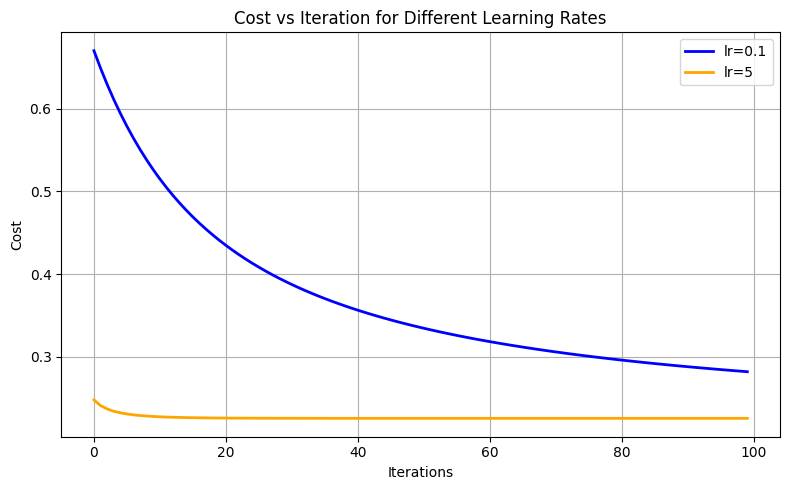

In [ ]:
# Training for learning rate 0.1 and 5
_, cost_lr_01 = gradient_descent_fixed_iters(X, y, alpha=0.1, num_iters=100)
_, cost_lr_5  = gradient_descent_fixed_iters(X, y, alpha=5,   num_iters=100)

# Plotting both cost curves
def plot_two_cost_curves(cost1, cost2, label1='lr=0.1', label2='lr=5'):
    plt.figure(figsize=(8, 5))
    plt.plot(range(len(cost1)), cost1, label=label1, color='blue', linewidth=2)
    plt.plot(range(len(cost2)), cost2, label=label2, color='orange', linewidth=2)
    plt.title('Cost vs Iteration for Different Learning Rates')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Calling the plot function
plot_two_cost_curves(cost_lr_01, cost_lr_5)


Q5.Find the confusion matrix for your training dataset.
Using the confusion matrix, calculate:

Accuracy

Precision

Recall

F1-Score



In [ ]:
# Predicting labels using learned theta
def predict(X, theta):
    probs = sigmoid(X @ theta)
    return (probs >= 0.5).astype(int)

# Computing confusion matrix and metrics
def evaluate_model(X, y, theta):
    y_pred = predict(X, theta)
    y_true = y.flatten()
    y_pred = y_pred.flatten()

    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))

    accuracy  = (TP + TN) / len(y_true)
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall    = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1_score  = 2 * precision * recall / (precision + recall) if (precision + recall) != 0 else 0

    print(f"Confusion Matrix:")
    print(f"TP: {TP}  FP: {FP}")
    print(f"FN: {FN}  TN: {TN}\n")

    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-Score:  {f1_score:.4f}")

# Evaluating model
evaluate_model(X, y, theta_final)


Confusion Matrix:
TP: 43  FP: 5
FN: 7  TN: 44

Accuracy:  0.8788
Precision: 0.8958
Recall:    0.8600
F1-Score:  0.8776
